In [155]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.disable_max_rows()

import networkx as nx
import datetime as dt
import seaborn as sns


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import svm
from xgboost import XGBClassifier

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

DECLARING ALL DATASETS

In [51]:
case =  pd.read_csv('case (1).csv')
patient_info = pd.read_csv('Patient.csv')
patient_route = pd.read_csv('route.csv')

In [52]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1,Seoul,Guro-gu,True,Guro-gu Call Center,70,37.508163,126.884387
1,2,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
2,3,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
3,4,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006
4,5,Seoul,Dongdaemun-gu,True,Dongan Church,9,37.592888,127.056766


In [53]:
patient_info.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


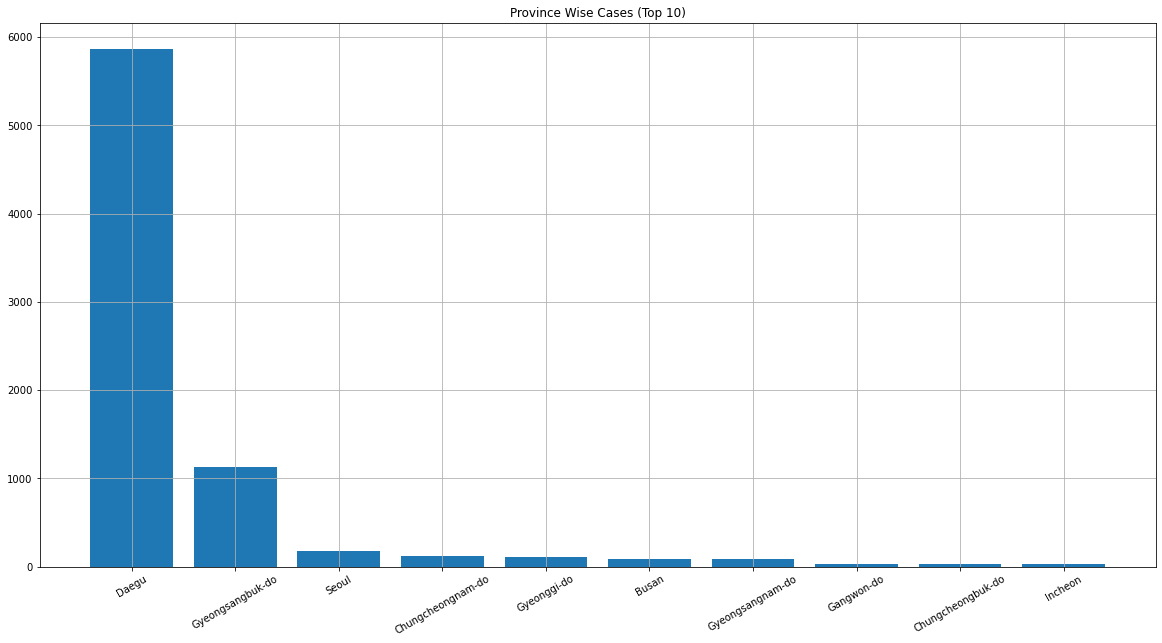

In [54]:
case_grouped_by_province = case.groupby(["province"]).sum().sort_values(["confirmed"],ascending = False)
plt.figure(figsize = (20,10))
plt.bar(case_grouped_by_province.index[:10],case_grouped_by_province["confirmed"][:10])
plt.title("Province Wise Cases (Top 10)")
plt.xticks(rotation = 30)
plt.grid()
plt.show()

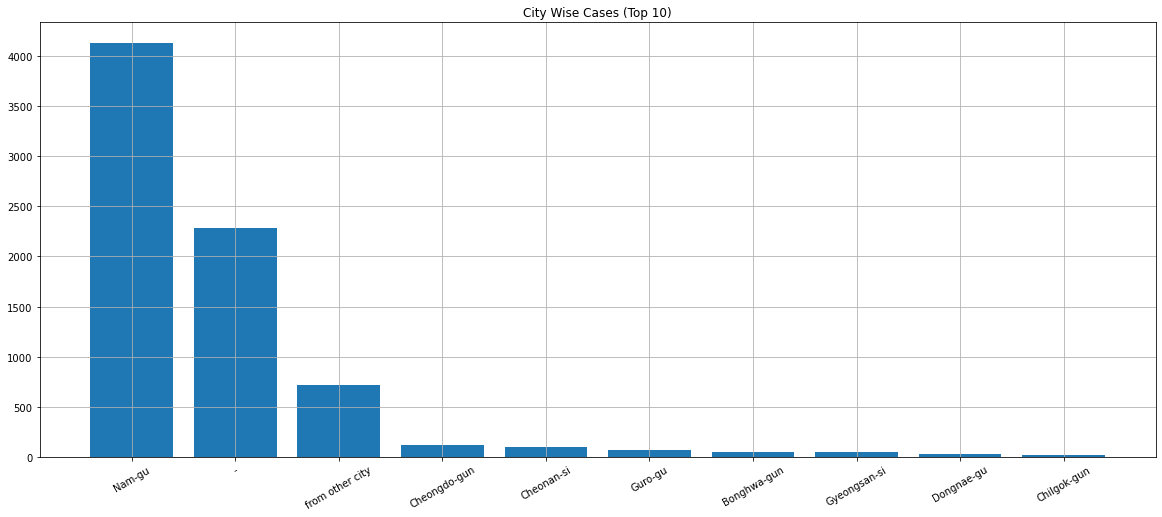

In [55]:
case_grouped_by_region = case.groupby(["city"]).sum().sort_values(["confirmed"],ascending = False)
plt.figure(figsize = (20,8))
plt.bar(case_grouped_by_region.index[:10],case_grouped_by_region["confirmed"][:10])
plt.title("City Wise Cases (Top 10)")
plt.xticks(rotation = 30)
plt.grid()
plt.show()

In [56]:
patient_info["age"] = (2022 - patient_info["birth_year"])
patient_info["released_date"] = pd.to_datetime(patient_info["released_date"])
patient_info["confirmed_date"] = pd.to_datetime(patient_info["confirmed_date"])
patient_info["discharge_time(days)"] = patient_info["released_date"] - patient_info["confirmed_date"]
patient_info["discharge_time(days)"] = pd.to_numeric(patient_info["discharge_time(days)"].astype(str).str[:3], errors='coerce')
display(patient_info.head())

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age,discharge_time(days)
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,38.0,17.0
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,58.0,12.0
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,56.0,17.0
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,58.0,13.0
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released,35.0,32.0


PIE GRAPH SHOWING NUMBER OF FEMALE & MALE ISOLATED,RELEASED AND DECEASED 

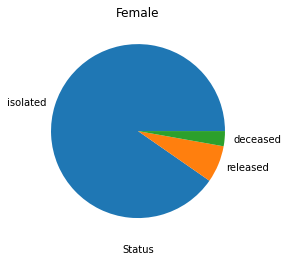

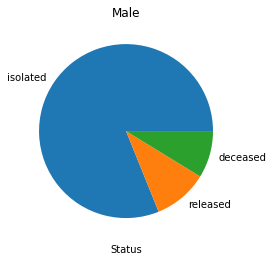

In [57]:
plt.pie(patient_info[patient_info["sex"] == "female"]["state"].value_counts().values,labels=patient_info[patient_info["sex"] == "female"]["state"].value_counts().index)
plt.grid()
plt.title("Female")
plt.xlabel("Status")
plt.show()

plt.pie(patient_info[patient_info["sex"] == "male"]["state"].value_counts().values,labels=patient_info[patient_info["sex"] == "male"]["state"].value_counts().index)
plt.grid()
plt.title("Male")
plt.xlabel("Status")
plt.show()

In [58]:
# model_lin_reg = LinearRegression()
# X = patient_info["age"]
# Y = patient_info["discharge_time(days)"]

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# model_lin_reg.fit(X_train,y_train)

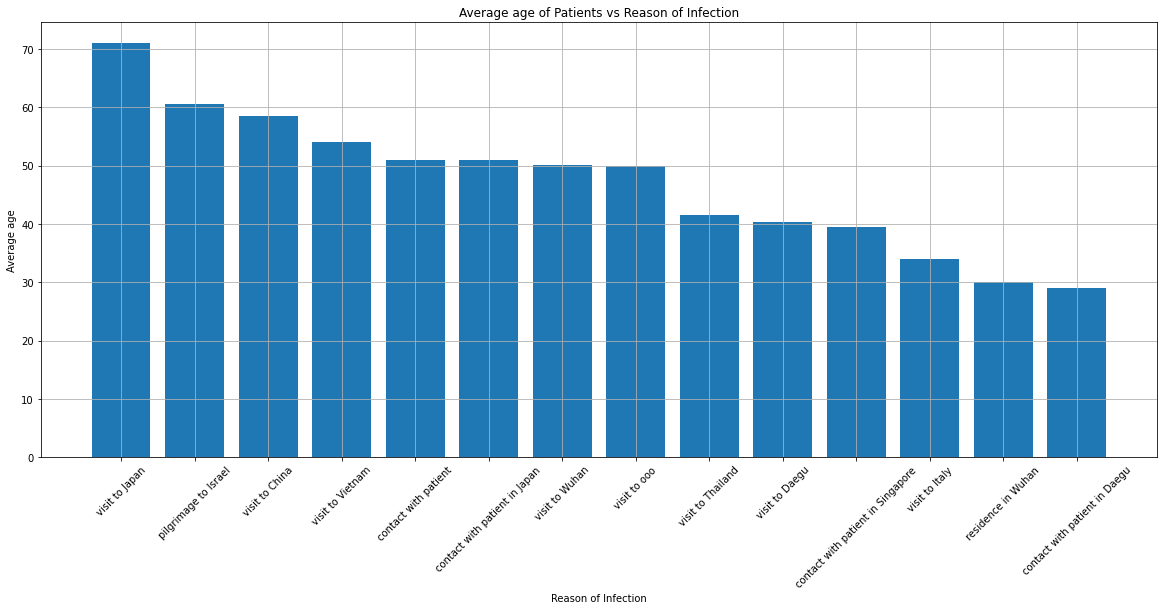

In [59]:
patient_info_grouped_by_infection_reason = patient_info.groupby(["infection_reason"]).mean().sort_values(["age"],ascending = False)
plt.figure(figsize = (20,8))
plt.bar(patient_info_grouped_by_infection_reason.index,patient_info_grouped_by_infection_reason["age"])
plt.xticks(rotation = 45)
plt.xlabel("Reason of Infection")
plt.ylabel("Average age")
plt.title("Average age of Patients vs Reason of Infection")
plt.grid()
plt.show()

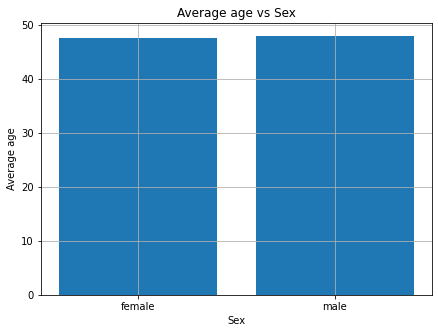

In [60]:
patient_info_grouped_by_sex = patient_info.groupby(["sex"]).mean()

plt.figure(figsize=(7,5))
plt.bar(patient_info_grouped_by_sex.index,patient_info_grouped_by_sex["age"])
plt.title("Average age vs Sex")
plt.xlabel("Sex")
plt.ylabel("Average age")
plt.grid()
plt.show()

In [61]:
patient_route["patient_id"] = patient_info["patient_id"]
patient_route.head()

,patient_id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,2,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,3,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,4,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,5,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [62]:
# Normalization Function

#def normalize_me(mlist):
    #max_ = max(mlist)
    #min_ = min(mlist)
    #normalized_list = []
    #for i in range(len(mlist)):
        #normalized_list.append((mlist[i]-min_)/(max_-min_))
    #return normalized_list

In [63]:
incidents = list(patient_info.groupby('confirmed_date').size())
dates = list(patient_info.groupby('confirmed_date').count().reset_index()['confirmed_date'])
patient_info_timeseries = pd.DataFrame(dates, columns=['date'])
patient_info_timeseries['incidents'] = incidents

In [64]:
alt.Chart(patient_info_timeseries).mark_line().encode(
    x = alt.X('date:T',axis = alt.Axis(title = 'Date')),
    y = alt.Y('incidents:Q',axis = alt.Axis(title = 'Confirmed Cases'))
).properties(
    width = 500,
    height = 350,
    title = 'Covid spread as in South Korea Dataset'
) 

alt.Chart(...)

In [65]:
patient_info_data = patient_info.dropna(subset=['age','sex'])

In [66]:
alt.Chart(patient_info_data[patient_info_data['age'] != '1987']).mark_bar().encode(
    x = alt.X('age:N',axis = alt.Axis(title = 'Age')),
    y = alt.Y('count():Q',axis = alt.Axis(title = 'Total Patients')),
    color = alt.Color('state:N',legend=alt.Legend(title = 'Class'))
).properties(
    width = 800,
    height = 350,
    title = 'Class distribution over Age groups'
)

alt.Chart(...)

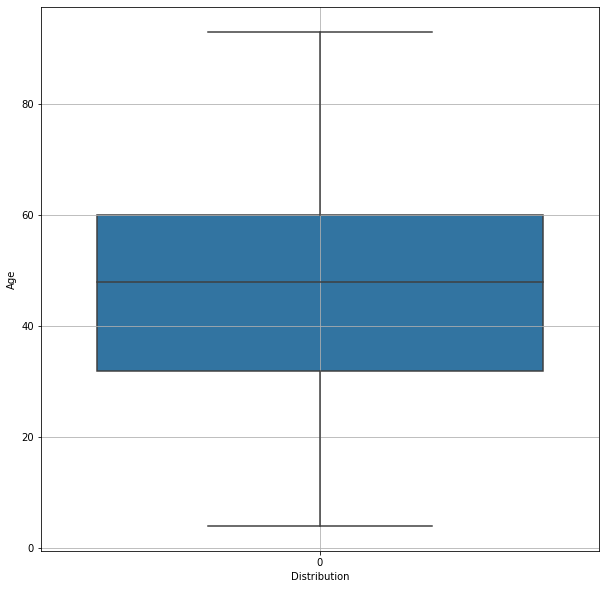

In [67]:
plt.figure(figsize = (10,10))
sns.boxplot(data = patient_info_data["age"])
plt.ylabel("Age")
plt.xlabel("Distribution")
plt.grid()
plt.show()

ENCODING FOR USING ALGORITHMS TO CHECK THE ACCURACY OF THE MODEL

In [68]:
def encode(x):
    if np.isnan(x):
        return 0
    else:
        return 1

def encode_v2(x):
    if x != 0:
        return 1
    else:
        return 0

def encode_sex(x):
    if x == 'male':
        return 0
    else:
        return 1

In [171]:
patient_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7869 entries, 0 to 7868
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   patient_id            7869 non-null   int64         
 1   sex                   679 non-null    object        
 2   birth_year            666 non-null    float64       
 3   country               7869 non-null   object        
 4   region                437 non-null    object        
 5   disease               28 non-null     float64       
 6   group                 86 non-null     object        
 7   infection_reason      154 non-null    object        
 8   infection_order       36 non-null     float64       
 9   infected_by           70 non-null     float64       
 10  contact_number        53 non-null     float64       
 11  confirmed_date        7869 non-null   datetime64[ns]
 12  released_date         56 non-null     datetime64[ns]
 13  deceased_date     

In [70]:
#patient_info.columns

LISTING ALL THE CATEGORICAL VALUES

In [71]:
numeric_data = patient_info.select_dtypes(include=[np.number])
categorical_data = patient_info.select_dtypes(exclude=[np.number])

categorical_data

,sex,country,region,group,infection_reason,confirmed_date,released_date,deceased_date,state
0,female,China,filtered at airport,NaN,visit to Wuhan,2020-01-20,2020-02-06,NaN,released
1,male,Korea,filtered at airport,NaN,visit to Wuhan,2020-01-24,2020-02-05,NaN,released
2,male,Korea,capital area,NaN,visit to Wuhan,2020-01-26,2020-02-12,NaN,released
3,male,Korea,capital area,NaN,visit to Wuhan,2020-01-27,2020-02-09,NaN,released
4,male,Korea,capital area,NaN,visit to Wuhan,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...
7864,NaN,Korea,NaN,NaN,NaN,2020-03-11,NaT,NaN,isolated
7865,NaN,Korea,NaN,NaN,NaN,2020-03-11,NaT,NaN,isolated
7866,NaN,Korea,NaN,NaN,NaN,2020-03-11,NaT,NaN,isolated
7867,NaN,Korea,NaN,NaN,NaN,2020-03-11,NaT,NaN,isolated


PLOTTING THE STATE OF THE PATIENTS IN HOSPITAL

Text(0, 0.5, 'PATIENTS')

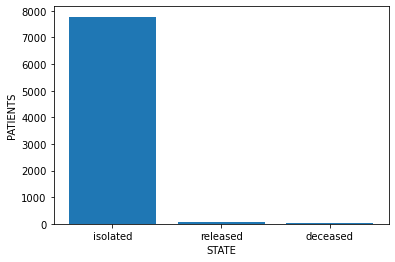

In [72]:
state_vc = categorical_data["state"].value_counts()

plt.bar(state_vc.index,state_vc)
plt.xlabel("STATE")
plt.ylabel("PATIENTS")

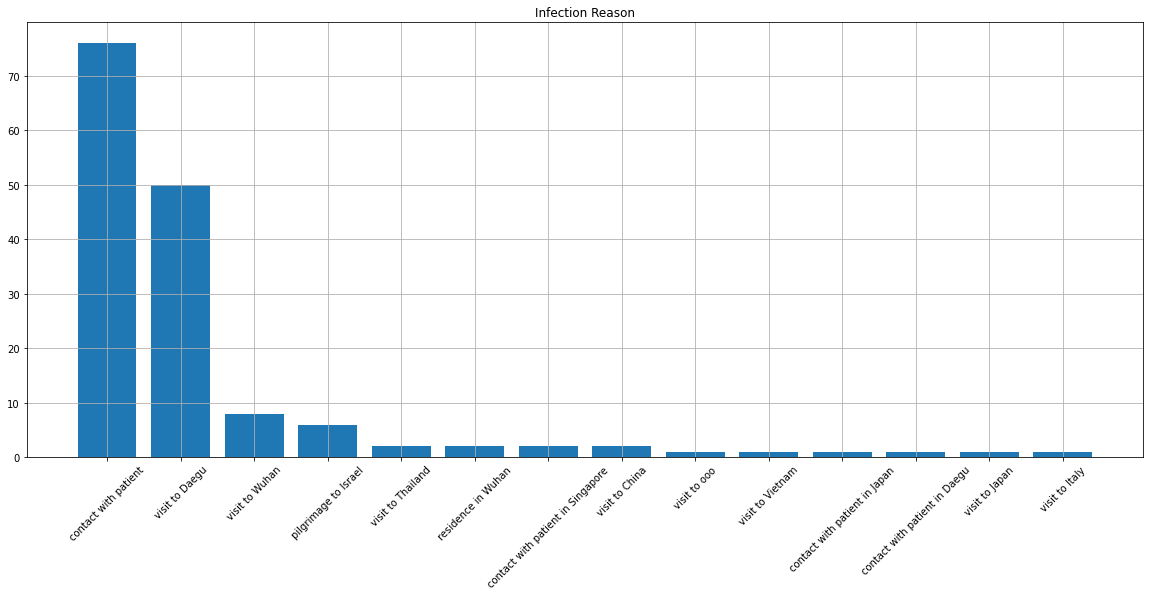

In [73]:
infection_reason_vc = categorical_data["infection_reason"].value_counts()
plt.figure(figsize = (20,8))
plt.bar(infection_reason_vc.index,infection_reason_vc)
plt.title("Infection Reason")

plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [74]:
patient_info['und_disease']= patient_info['disease'].apply(encode)
patient_info['infection_caused'] = patient_info['infected_by'].apply(encode)
patient_info['exact_age'] = 2020 - patient_info['birth_year']
patient_info['encoded_sex'] = patient_info['sex'].apply(encode_sex)


In [103]:
patient_info.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,...,confirmed_date,released_date,deceased_date,state,age,discharge_time(days),und_disease,infection_caused,exact_age,encoded_sex
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,...,2020-01-20,2020-02-06,NaN,released,38.0,17.0,0,0,36.0,1
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,...,2020-01-24,2020-02-05,NaN,released,58.0,12.0,0,0,56.0,0
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,...,2020-01-26,2020-02-12,NaN,released,56.0,17.0,0,0,54.0,0
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,...,2020-01-27,2020-02-09,NaN,released,58.0,13.0,0,0,56.0,0
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,...,2020-01-30,2020-03-02,NaN,released,35.0,32.0,0,0,33.0,0


Predicting State with age 

In [279]:
new_df = patient_info[["age","state"]]
new_df.dropna(inplace=True)

LE = LabelEncoder()
new_df["state"] = LE.fit_transform(new_df["state"])

X = new_df["age"]
print(X)
Y = new_df["state"]
print(Y)
model_xgb_new = XGBClassifier()
model_xgb_new.fit(X,Y)

0       38.0
1       58.0
2       56.0
3       58.0
4       35.0
        ... 
5580     9.0
5766    84.0
5767    87.0
6284    93.0
7195    77.0
Name: age, Length: 666, dtype: float64
0       2
1       2
2       2
3       2
4       2
       ..
5580    1
5766    0
5767    0
6284    0
7195    0
Name: state, Length: 666, dtype: int64


<ipython-input-279-cef572bd3601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)
<ipython-input-279-cef572bd3601>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["state"] = LE.fit_transform(new_df["state"])


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [286]:
#Create a dropdown menu for the item
def f(x):
    display(x)
    return x

C1 = range(1,100)
P1 = interactive(f, x=widgets.Dropdown(options=C1 ,description='Age:',disabled=False))
print("Select Age: ")
display(P1)

Select Age: 


interactive(children=(Dropdown(description='Age:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…

In [289]:
age = P1.result
result = model_xgb_new.predict(age)

if(result[0] == 0):
    print("Status: Deceased")
elif(result[0] == 1):
    print("Status: Released")
else:
    print("Status: Isolated")

Status: Deceased


USING RANDOM FOREST

In [76]:

from sklearn import preprocessing
ml_subset = patient_info[['country','und_disease','exact_age','encoded_sex','infection_caused','state']]
ml_subset = ml_subset[ml_subset['exact_age'] >0]
ml_subset['country'] = ml_subset['country'].astype('category')
#ml_subset['region'] = ml_subset['region'].astype('category')
le = preprocessing.LabelEncoder()
ml_subset['encoded_country'] = le.fit_transform(ml_subset['country'])
#ml_subset['encoded_region'] = le.fit_transform(ml_subset['region'])
ml_subset['encoded_class'] = le.fit_transform(ml_subset['state'])
ml_subset['exact_age'] = le.fit_transform(ml_subset['exact_age'])

     

In [77]:
labels = ml_subset['encoded_class']
ml_subset_final = ml_subset[['und_disease','exact_age','encoded_sex', 'infection_caused','encoded_country',]]
X_train, X_test, y_train, y_test = train_test_split(ml_subset_final, labels, test_size=0.33, random_state=42)  


ml_subset_final.head()

,und_disease,exact_age,encoded_sex,infection_caused,encoded_country
0,0,26,1,0,0
1,0,46,0,0,1
2,0,44,0,0,1
3,0,46,0,0,1
4,0,23,0,0,1


In [78]:
rf = RandomForestClassifier(max_depth=5,random_state=0)
rf.fit(X_train, y_train)
rf_accuracy = np.sum(rf.predict(X_test) == y_test)/len(y_test)*100
print('Accuracy on the test set is {:.2f} %'.format(rf_accuracy))

Accuracy on the test set is 89.55 %


LOGISTIC REGRESSION

In [79]:
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)
y_pred = model_LR.predict(X_test)
lr_accuracy = round(accuracy_score(y_pred,y_test)*100,2)
print("Accuracy is: ",lr_accuracy)

Accuracy is:  90.45


/Users/biswayanpaul/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


USING XGBOOST


In [80]:
model_XGB= XGBClassifier()
model_XGB.fit(X_train,y_train)
y_pred=model_XGB.predict(X_test)
xgb_accuracy = round(accuracy_score(y_pred,y_test)*100,2)
print("Accuracy on test set is: ",xgb_accuracy)

Accuracy on test set is:  86.36


USING SVM

In [81]:
model_svc=svm.SVC(kernel='linear')
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)
svc_accuracy = round(accuracy_score(y_pred,y_test)*100,2)
print("Accuracy on test set is: ",svc_accuracy)

Accuracy on test set is:  90.0


LIISTING ALL THE ACCURACY 

In [82]:
accuracy_list = [rf_accuracy,lr_accuracy,xgb_accuracy,svc_accuracy]
accuracy_df = pd.DataFrame(accuracy_list,columns=["Accuracy"])
accuracy_df

,Accuracy
0,89.545455
1,90.450000
2,86.360000
3,90.000000


PLOTTING THE ACCURACY OF THE MODEL USING BAR GRAPH

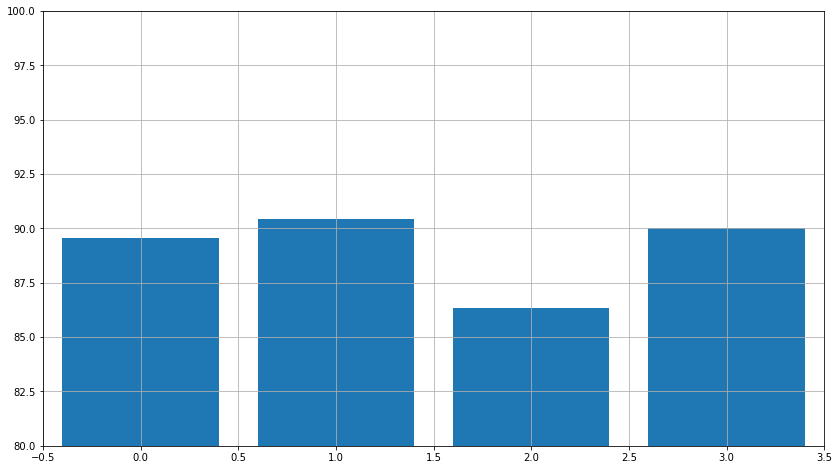

In [83]:
plt.figure(figsize=(14,8))
plt.bar(accuracy_df.index,accuracy_df.Accuracy)
plt.grid()
plt.axis([-0.5, 3.5, 80, 100])
plt.show()

In [93]:
print("Test Data: ")
display(X_test)
display(y_pred)

Test Data: 


,und_disease,exact_age,encoded_sex,infection_caused,encoded_country
3262,0,14,1,0,1
179,0,17,1,0,1
3814,0,41,0,0,1
351,0,42,1,0,1
1243,0,41,0,0,1
...,...,...,...,...,...
503,0,17,0,0,1
2178,0,65,1,0,1
4742,0,44,0,0,1
441,0,45,0,0,1


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])